In [1]:
import src.arctic as arctic
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Given Data
- from Institute of Atmospheric Physics Kühlungsborn (IAP)
- Differentiated between ERA5 and UA-ICON(NWP) data

1. ERA5: daily means at pressure levels and analysis
    - Intercomparison with Hannachi et al. (2011)
    - SWE1.tar: contains major warming diagnostics
    - SWE1.tar: elliptic diagnostics of Z10
    - SWX1.tar: extended diagnostics (reachable via VPN)
    - SWC1.tar: classfiication synthesis (reachable via VPN)
2. NWP4A60: data at pressure levels and analysis
    - SWM2.tar: major warming diagnostics
    - SWE2.tar: elliptic diagnostics of Z10
    - SWX2.tar: extended diagnostics (VPN)
    - SWC2.tar: classification synthesis (VPN)

#### File structure
netCDF files are 3-dimensional data, investigated with ncdump. The .tar-files contain all output from Christoph Zülickes diagnosis, in particular:
- SWM: ASCII values in 2 files, 
    1. *cen.csv with the major warming events as identified with their central day when the wind turned from westerly to easterly along with some characteristics and
    2. *msw.csv with daily lists with wind and a marker mw for major warming
- SWE: 1 csv file
    - *d.csv: daily list of indices, including the aspect ratio of the mother vortex (ar), centrail latitude (latcent) and area (area)

In [2]:
nwp_d = arctic.utils.read_data("data/SWXClust/NWP4A60/i4a60e2_d.csv")
print("Daily data: ", nwp_d.shape)
nwp_cen= arctic.utils.read_data("data/SWXClust/NWP4A60/i4a60m2t-cen.csv")
nwp_msw = arctic.utils.read_data("data/SWXClust/NWP4A60/i4a60m2t-msw.csv")

arctic.utils.no_white_space(nwp_d)
arctic.utils.no_white_space(nwp_cen)
arctic.utils.no_white_space(nwp_msw)

# change string to datetime for better comparison
arctic.utils.to_date(nwp_d, 'string')
arctic.utils.to_date(nwp_cen, 'string')
arctic.utils.to_date(nwp_msw, 'string')

# replace empty strings
nwp_d = nwp_d.replace('                   ' ,np.NaN)

nwp_d.info()

Daily data:  (22462, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22462 entries, 0 to 22461
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   D          22462 non-null  object        
 1   counter    22462 non-null  int64         
 2   time       22462 non-null  float64       
 3   string     22462 non-null  datetime64[ns]
 4   year       22462 non-null  int64         
 5   month      22462 non-null  int64         
 6   day        22462 non-null  int64         
 7   hour       22462 non-null  int64         
 8   level      22462 non-null  float64       
 9   edge       22462 non-null  float64       
 10  form       22462 non-null  object        
 11  area       22462 non-null  float64       
 12  obj_area   22462 non-null  float64       
 13  latcent    22462 non-null  float64       
 14  loncent    22462 non-null  float64       
 15  theta      22462 non-null  float64       
 16  ar         2246

## Features in data and their description
#### for *cen files

35x9

| ERA5            | D_cen                       | num                   | counter_cen                                            | time_cen                 | string                  | pers                 | Umax                      | Imax                     | Iacc                            |
|-----------------|-----------------------------|-----------------------|--------------------------------------------------------|--------------------------|-------------------------|----------------------|---------------------------|--------------------------|---------------------------------|
| Values          | 'D'                         | [1,35]                | [26, 21189]                                            | [2438057.25, 2459220.35] | [1963-01-27,2021-05-01] | [2.0,29]             | [-26.9,-0.9]              | [1.7,780.1]              | [1.4,316.5]                     |
| Explanation     | Line belongs to data in csv | Counter of SSW events | Central time counter <br/> index matching measurements | Julian central date      | human readable date     | persistence of event | max. east wind during SSW | max. SSW event intensity | accumulated SSW event intensity |
| Condition       | -                           | -                     |                                                        |                          |                         |                      |                           |                          |                                 |
| Normalization   | no                          | no                    |                                                        |                          |                         |                      |                           |                          |                                 |
| Units           | -                           | -                     | run step                                               | run time                 | run time                | days                 | m/s                       | days m/s                 | days m/s                        |
| Value for model | None                        | Probably none         | Merge key                                              | Merge key                | Merge key               |                      |                           |                          |                                 |

#### for *msw files

21914x6

| ERA5            | D_msw          | counter_msw                                                 | time_msw                 | string                  | u             | MW                  |
|-----------------|----------------|-------------------------------------------------------------|--------------------------|-------------------------|---------------|---------------------|
| Values          | 'D'            | [1, 21914]                                                  | [2438032.25, 2459944.25] | String encoding of date | [-28.8, 73.5] | [0,1] (i.e. no/yes) |
| Explanation     | Line with data | Counter of events, <br/>each daily measurement gets counter | Julian central date      | human readable date     | zonal wind    | marks major warming |
| Condition       | -              |                                                             |                          |                         | ??            |                     |
| Normalization   | no             | no                                                          |                          | no                      |               | no, encode as 0-1   |
| Value for Model | None           | Merge key                                                   | Merge key                | Merge key               | include       | should be included  |



#### for *d files

22403x35

21425 + 978 (D vs. S)

**bold font**: unclear meaning

| ERA5      | Values                   | Explanation                                                                                                  | Condition    | Normalisation  | Value for Model                                                                                           |
|-----------|--------------------------|--------------------------------------------------------------------------------------------------------------|--------------|----------------|-----------------------------------------------------------------------------------------------------------|
| D         | 'D'                      | Line with data                                                                                               |              | -              |                                                                                                           |
| counter   | [1,21914]                | counter of daily measurements                                                                                | -            | -              |                                                                                                           |
| time_d    | [2438031.25, 2459944.25] | Julian day                                                                                                   | -            |                | Merge Key                                                                                                 |
| string    | [1963-01-01, 2022-12-30] | Human readable/string form of date                                                                           |              |                | Merge Key                                                                                                 |
| year      | [1963                    | numeric form of year                                                                                         |              |                | useful                                                                                                    |
| month     | [1,12]                   | numeric form of month                                                                                        |              |                | useful                                                                                                    |
| day       | [1,31]                   | numeric form of day                                                                                          |              |                | useful                                                                                                    |
| hour      | 18                       | numeric form of hour                                                                                         |              |                | None, daily measurement                                                                                   |
| level     | 10                       | Pressure level in hPa, ca. 30km                                                                              |              |                | Currently not huge as not varied,  important for comparison with other studies                            |
| **edge**  | [28.9,        32.3]      | Edge of Vortex? °N? Assumption as circle/ellipsoid around pole?<br/>Strong correlation with generated labels |              |                |                                                                                                           |
| form     | [' D', ' S']             | Form of Vortex: <br/>Displaced (4599 in era5_hannachi), <br/> Split (502 in era5_hannachi)                   |              | Encode as int? | Important, evaluation of clusters                                                                         |
| **area**  | [7105100.0,162460000.0]  | Area of Vortex [km^2]                                                                                        |              |                |                                                                                                           |
| **obj_area** | [11163.0,  3850800.0]    | Objective area of vortex [km^2], diference to area?                                                          |              |                |                                                                                                           |
| latcent   | [50.823, 89.966]         | Latitude of centre                                                                                           |              |                |                                                                                                           |
| loncent   | [-89.993,269.95]         | Longitude of centre                                                                                          |              |                |                                                                                                           |
| theta     | [-1.5707, 1.5797]        | angle of major axis                                                                                          |              |                |                                                                                                           |
| ar        | [1.0001, 4.8253]         | Aspect ratio of polar vortex                                                                                 |              |                |                                                                                                           |
| kurtosis  | [-0.81021,10.235]        | Kurtosis of polar vortex                                                                                     |              |                |                                                                                                           |
| area1     | [na, 29034864.000]       | Area of split vortex 1 [km^2]                                                                                | Split event? |                | Important, but more for evaluation <br/> may irritate cluster algorithms (implicit information of events) |
| obj_area1 | [na, 592939.812]         |                                                                                                              |              |                |                                                                                                           |
| latcent1  | [na, 88.211]             | Latitude of centroid 1                                                                                       |              |                |                                                                                                           |
| loncent1  | [na, 269.912]            | Longitude of centroid 1                                                                                      |              |                |                                                                                                           |
| theta1    | [na, -1.569]             |                                                                                                              |              |                |                                                                                                           |
| ar1       | [na, 3.651]              | Aspect ratio                                                                                                 |              |                |                                                                                                           |
| area2     | [na, 33281544.000]       | Area of split vortex 2 [km^2]                                                                                |              |                |                                                                                                           |
| obj_area2 | [na, 635659.312]         |                                                                                                              |              |                |                                                                                                           |
| latcent2  | [na, 87.856]             |                                                                                                              |              |                |                                                                                                           |
| loncent2  | [na, 202.300]            |                                                                                                              |              |                |                                                                                                           |
| theta2    | [na, -1.570]             |                                                                                                              |              |                |                                                                                                           |
| ar2       | [na, 4.117]              |                                                                                                              |              |                |                                                                                                           |
| **amp0**  | [27.6, 32.3]             | zonal mean                                                                                                   |              |                |                                                                                                           |
| **amp1**  | [0.000024,  0.0489]      | amplitude of wave 1                                                                                          |              |                |                                                                                                           |
| **amp2**  | [0.000003, 0.0543]       | amplitude of wave 2                                                                                          |              |                |                                                                                                           |
| **lon1**  | [-180.0, 180.0]          | angle of wave 1                                                                                              |              |                |                                                                                                           |
| **lon2**  | [-180.0, 180.0]          | angle of wave 2                                                                                              |              |                |                                                                                                           |

### Handling NaN Values
- *cen-file produces most NaN values in data due to merch and marking special events &rArr; 0 not used in *num, counter, time, pers, Imax, Iacc,Umax
- *d file produces also a lot of NaN values, when form = 'S', i.e. split with 2 new vortexes &rArr; for $$k\in\{1,2\}, \theta_k \in \{-1.6, 1.6\}, loncent_k \in \{-180, 180\}$$ &rArr; 0 no suitable replacment for NaN; instead -999 is used as obviously no valid value for theta nor coordinates.

In [3]:
# merge data to one big dataframe
nwp = nwp_d.merge(nwp_msw, on ='string', how='left', suffixes=[None, '_msw']).merge(nwp_cen, on='string', how='left', suffixes = ['_d', '_cen'])

# Uncomment the 2 lines below to check if 0 is a valid replacement for NaN values
# print(nwp.iloc[:, -7:].max())
# print(nwp.iloc[:, -7:].min())
# fillna in *cen
nwp.iloc[:, -8:] = nwp.iloc[:, -8:].fillna(0)

# change dtype and fill NaN values when split vortex
cols = nwp.columns[18:30]
cols_999 = ['theta1', 'theta2', 'loncent1', 'loncent2']
nwp[cols] = nwp[cols].apply(pd.to_numeric, errors='coerce')
nwp[cols_999] = nwp[cols_999].fillna(-999)
nwp[cols] = nwp[cols].fillna(0)


# encode MW as MW = 1, else 0
from sklearn.preprocessing import LabelEncoder
le_mw = LabelEncoder()
nwp['MW'] = le_mw.fit_transform(nwp.MW)
print(f"Transformed 'MW':\n{le_mw.inverse_transform([1])} to 1\n{le_mw.inverse_transform([0])} to 0")

# encode form with label encoder
le_form = LabelEncoder()
nwp['form'] = le_form.fit_transform(nwp.form)
print(f"Transformed 'form':\n{le_form.inverse_transform([1])} to 1\n{le_form.inverse_transform([0])} to 0")

# drop D_*
nwp = nwp.drop(['D_cen', 'D_d', 'D_msw'], axis=1)
nwp.info()

Transformed 'MW':
[' MW'] to 1
['   '] to 0
Transformed 'form':
[' S'] to 1
[' D'] to 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22462 entries, 0 to 22461
Data columns (total 45 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   counter_d    22462 non-null  int64         
 1   time_d       22462 non-null  float64       
 2   string       22462 non-null  datetime64[ns]
 3   year         22462 non-null  int64         
 4   month        22462 non-null  int64         
 5   day          22462 non-null  int64         
 6   hour         22462 non-null  int64         
 7   level        22462 non-null  float64       
 8   edge         22462 non-null  float64       
 9   form         22462 non-null  int64         
 10  area         22462 non-null  float64       
 11  obj_area     22462 non-null  float64       
 12  latcent      22462 non-null  float64       
 13  loncent      22462 non-null  float64       
 14  theta        2

In [4]:
# correlation within data
arctic.plot_correlation(nwp, savefig="output/corr_nwp.png")

,counter_d,time_d,year,month,day,hour,level,edge,form,area,obj_area,latcent,loncent,theta,ar,kurtosis,area1,obj_area1,latcent1,loncent1,theta1,ar1,area2,obj_area2,latcent2,loncent2,theta2,ar2,amp0,amp1,amp2,lon1,lon2,counter_msw,time_msw,u,MW,num,counter_cen,time_cen,pers,Umax,Imax,Iacc
counter_d,1.000000,1.000000,0.999868,0.003952,0.001382,nan,nan,-0.017441,-0.031118,-0.003670,0.012101,0.008671,0.005552,-0.015708,-0.017428,0.003830,-0.030522,-0.027127,-0.032980,-0.031061,-0.031107,-0.027068,-0.030750,-0.027188,-0.032168,-0.031505,-0.031123,-0.024966,-0.022834,0.001959,0.013661,0.000331,-0.000797,1.000000,1.000000,0.031896,0.008637,0.020089,0.019144,0.002923,0.002777,0.000075,0.003018,0.002856
time_d,1.000000,1.000000,0.999868,0.003952,0.001382,nan,nan,-0.017441,-0.031118,-0.003670,0.012101,0.008671,0.005552,-0.015708,-0.017428,0.003830,-0.030522,-0.027127,-0.032980,-0.031061,-0.031107,-0.027068,-0.030750,-0.027188,-0.032168,-0.031505,-0.031123,-0.024966,-0.022834,0.001959,0.013661,0.000331,-0.000797,1.000000,1.000000,0.031896,0.008637,0.020089,0.019144,0.002923,0.002777,0.000075,0.003018,0.002856
year,0.999868,0.999868,1.000000,-0.012251,-0.000142,nan,nan,-0.019907,-0.030468,-0.003796,0.012914,0.006164,0.005158,-0.015299,-0.017336,0.003715,-0.029878,-0.026580,-0.032376,-0.030438,-0.030457,-0.026378,-0.030090,-0.026658,-0.031577,-0.030849,-0.030472,-0.024294,-0.024995,0.006504,0.017607,0.000025,0.001391,0.999868,0.999868,0.033197,0.008961,0.020039,0.019084,0.002829,0.002878,-0.000022,0.003226,0.003055
month,0.003952,0.003952,-0.012251,1.000000,0.010500,nan,nan,0.154613,-0.040354,0.009609,-0.049176,0.155482,0.024051,-0.024090,-0.006328,0.013649,-0.040139,-0.035011,-0.037829,-0.038740,-0.040327,-0.041659,-0.041414,-0.034113,-0.036998,-0.040679,-0.040355,-0.041017,0.135855,-0.282448,-0.245113,0.019998,-0.133743,0.003952,0.003952,-0.082815,-0.022225,0.002373,0.003001,0.005320,-0.006263,0.006084,-0.012756,-0.012203
day,0.001382,0.001382,-0.000142,0.010500,1.000000,nan,nan,0.010352,0.004909,0.012366,-0.003974,0.001916,0.015686,-0.007555,-0.005085,-0.089829,0.006561,0.014588,0.008547,0.005560,0.004906,-0.008436,0.009994,0.016573,0.008578,0.004802,0.004916,-0.003209,0.011173,-0.007962,-0.011954,-0.008030,0.007350,0.001382,0.001382,-0.011569,0.021488,0.006947,0.007011,0.004469,-0.001545,0.000514,-0.002669,-0.002817
hour,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
level,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
edge,-0.017441,-0.017441,-0.019907,0.154613,0.010352,nan,nan,1.000000,-0.008673,0.807828,0.324020,0.386560,0.377750,0.193253,-0.403639,-0.145643,-0.008962,-0.025384,-0.011324,-0.006369,-0.008671,-0.003460,-0.008747,-0.027412,-0.011671,-0.008619,-0.008660,-0.001978,0.979869,-0.805063,-0.822270,0.145536,0.393540,-0.017441,-0.017441,-0.913858,-0.018936,-0.007036,-0.007129,-0.008230,-0.006897,0.006030,-0.004312,-0.004529
form,-0.031118,-0.031118,-0.030468,-0.040354,0.004909,nan,nan,-0.008673,1.000000,-0.052641,-0.054247,-0.066217,-0.026256,0.010341,0.439993,-0.014599,0.967728,0.748870,0.990313,0.992201,0.999999,0.936966,0.970466,0.768113,0.991514,0.999646,1.000000,0.947862,0.015798,-0.017332,-0.023814,-0.016211,0.044763,-0.031118,-0.031118,-0.042399,0.059322,0.007666,0.007607,0.019394,0.031165,-0.027608,0.026442,0.026939
area,-0.003670,-0.003670,-0.003796,0.009609,0.012366,nan,nan,0.807828,-0.052641,1.000000,0.660935,0.475690,0.297919,0.132341,-0.502716,-0.336794,-0.047061,-0.034092,-0.052709,-0.052583,-0.052639,-0.050778,-0.047413,-0.035165,-0.052562,-0.052674,-0.052640,-0.051466,0.760882,-0.625754,-0.593962,0.138901,0.333123,-0.003670,-0.003670,-0.711003,-0.030860,-0.011117,-0.011049,-0.011631,-0.009893,0.009194,-0.006877,-0.007076


In [5]:
gap = arctic.gap_statistic(nwp.drop('string', axis=1), k_max=5, n_replicates=10)
gap_ar_latcent = arctic.gap_statistic(nwp[['ar', 'latcent']], k_max=5, n_replicates=10)
gap_ar_latcent_area = arctic.gap_statistic(nwp[['ar', 'latcent', 'area']], k_max=5, n_replicates=10)

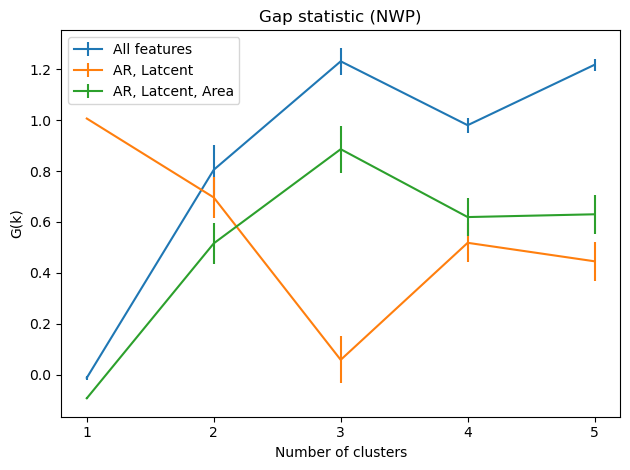

In [6]:
plt.errorbar(np.arange(1,6), gap[:, 0], yerr=gap[:, 1], label='All features')
plt.errorbar(np.arange(1,6), gap_ar_latcent[:, 0], yerr=gap_ar_latcent[:, 1], label='AR, Latcent')
plt.errorbar(np.arange(1,6), gap_ar_latcent_area[:, 0], yerr=gap_ar_latcent[:, 1], label='AR, Latcent, Area')
plt.legend()
plt.xticks(np.arange(1,6))
plt.xlabel('Number of clusters')
plt.title('Gap statistic (NWP)')
plt.ylabel('G(k)')
plt.tight_layout()
plt.savefig('./output/gap_nwp.png')
plt.show()

In [7]:
def test_compute_gap_statistic(X, k_max, n_replicates=10):
    """
    Compute the Gap Statistic for a range of cluster numbers.

    Parameters:
    X: array-like, shape (n_samples, n_features)
        The input data.
    k_max: int
        The maximum number of clusters to evaluate.
    n_replicates: int
        The number of bootstrap samples.

    Returns:
    gap_values: list
        The calculated gap values for each k.
    """
    # Generate reference data from a uniform distribution
    def generate_reference_data(X):
        return np.random.uniform(low=X.min(axis=0), high=X.max(axis=0), size=X.shape)

    gap_values = []
    
    # Loop over a range of k values (1 to k_max)
    for k in range(1, k_max + 1):
        # Fit KMeans to the original data
        from sklearn.cluster import KMeans
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        original_inertia = kmeans.inertia_

        # Compute the average inertia for the reference datasets
        reference_inertia = []
        for _ in range(n_replicates):
            random_data = generate_reference_data(X)
            kmeans.fit(random_data)
            reference_inertia.append(kmeans.inertia_)

        # Calculate the Gap statistic
        gap = np.log(np.mean(reference_inertia)) - np.log(original_inertia)
        gap_values.append(gap)

    return gap_values


from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
def test_elbow_method(X, k_max):
    distortions = []
    inertias = []
    
    for k in range(1, k_max+1):
        kmeanModel = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X)
        
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / X.shape[0])
        
        inertias.append(kmeanModel.inertia_)
    return distortions, inertias

AttributeError: 'Figure' object has no attribute 'xlabel'

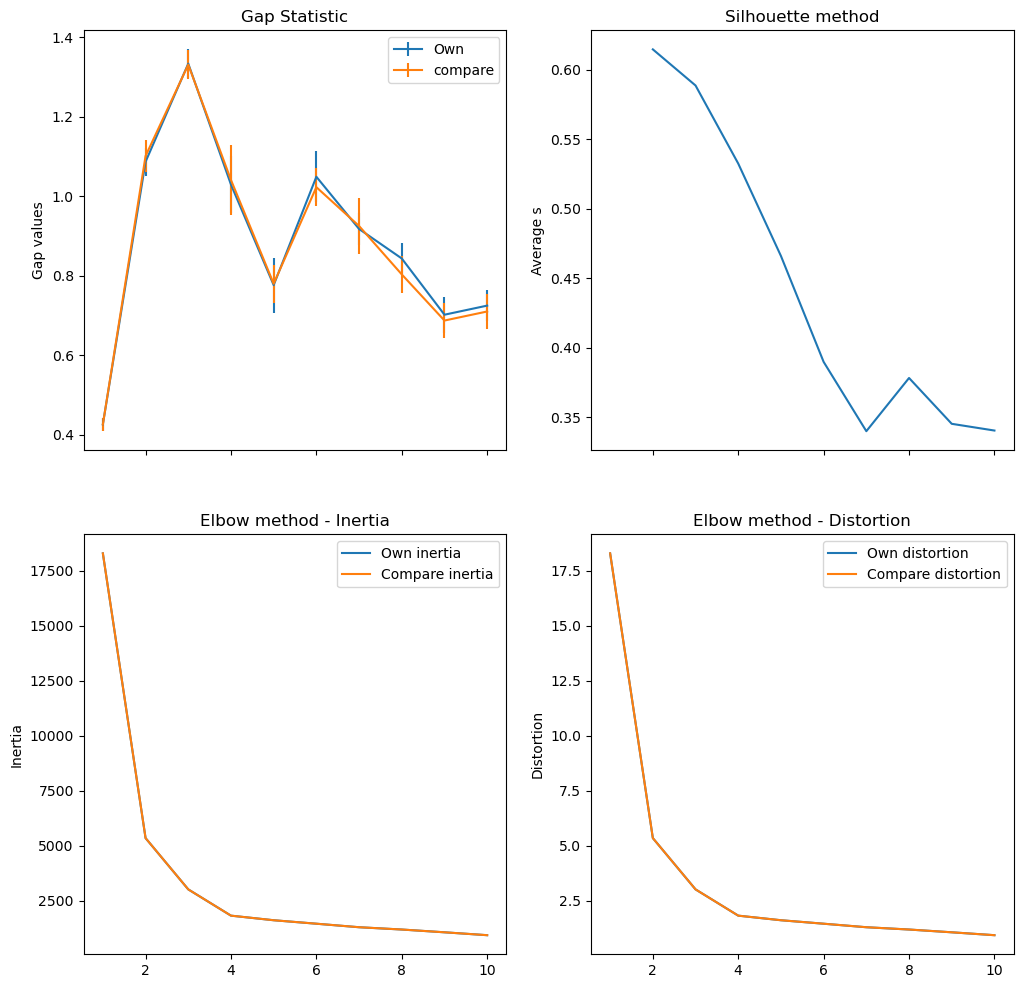

In [8]:
from sklearn.datasets import make_blobs

# test data
X, y = make_blobs(1000, n_features=2, centers=4)
k_max = 10
K = np.arange(1, k_max+1)

# test methods
gap_own = arctic.gap_statistic(X, k_max=k_max, n_replicates=10) # note: hierarchical model
gap_compare = arctic.gap_statistic(X, k_max=k_max, n_replicates=10) # vs. kmeans model

elbow_own = arctic.elbow_method(X, k_max=k_max)
elbow_test = test_elbow_method(X, k_max=k_max)

silhouette_own = arctic.silhouette_method(X, k_max=k_max)

fig, ax = plt.subplots(2,2, figsize=(12,12), sharex=True)

ax[0][0].errorbar(K, gap_own[:, 0], yerr=gap_own[:, 1], label='Own')
ax[0][0].errorbar(K, gap_compare[:, 0], yerr=gap_compare[:, 1], label='compare')
ax[0][0].legend()
ax[0][0].set_ylabel('Gap values')
ax[0][0].set_title('Gap Statistic')

ax[0][1].plot(K[1:], silhouette_own)
ax[0][1].set_ylabel('Average s')
ax[0][1].set_title('Silhouette method')

ax[1][0].plot(K, elbow_own[1][:], label='Own inertia')
ax[1][0].plot(K, elbow_test[1][:], label='Compare inertia')
ax[1][0].legend()
ax[1][0].set_ylabel('Inertia')
ax[1][0].set_title('Elbow method - Inertia')

ax[1][1].plot(K, elbow_own[0][:], label='Own distortion')
ax[1][1].plot(K, elbow_test[0][:], label='Compare distortion')
ax[1][1].set_ylabel('Distortion')
ax[1][1].legend()
ax[1][1].set_title('Elbow method - Distortion')

fig.xlabel('Number of clusters')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.datasets import make_blobs
X = nwp[['ar', 'latcent']]
k_max = 5
K = np.arange(1, k_max+1)

# test methods
gap_own = arctic.gap_statistic(X, k_max=k_max, n_replicates=10) # note: hierarchical model
gap_compare = arctic.gap_statistic(X, k_max=k_max, n_replicates=10) # vs. kmeans model

elbow_own = arctic.elbow_method(X, k_max=k_max)
elbow_test = test_elbow_method(X, k_max=k_max)

silhouette_own = arctic.silhouette_method(X, k_max=k_max)

fig, ax = plt.subplots(2,2, figsize=(12,12))

ax[0][0].errorbar(K, gap_own[:, 0], yerr=gap_own[:, 1], label='Own')
ax[0][0].errorbar(K, gap_compare[:, 0], yerr=gap_compare[:, 1], label='compare')
ax[0][0].legend()
ax[0][0].set_title('Gap Statistic')

ax[0][1].plot(K[1:], silhouette_own)
ax[0][1].set_title('Silhouette method')

ax[1][0].plot(K, elbow_own[1][:], label='Own inertia')
ax[1][0].plot(K, elbow_test[1][:], label='Compare inertia')
ax[1][0].legend()
ax[1][0].set_title('Elbow method - Inertia')

ax[1][1].plot(K, elbow_own[0][:], label='Own distortion')
ax[1][1].plot(K, elbow_test[0][:], label='Compare distortion')
ax[1][1].legend()
ax[1][1].set_title('Elbow method - Distortion')

plt.tight_layout()
plt.show()